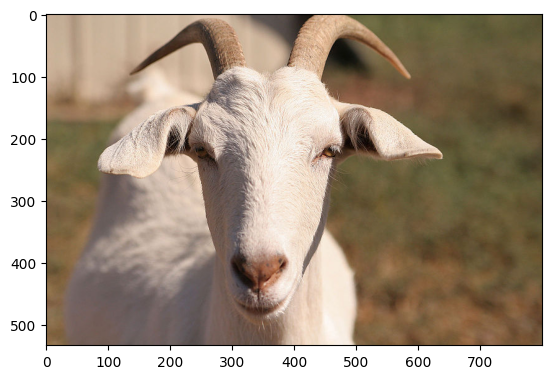

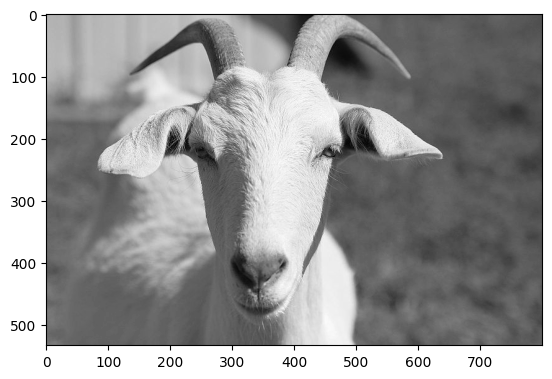

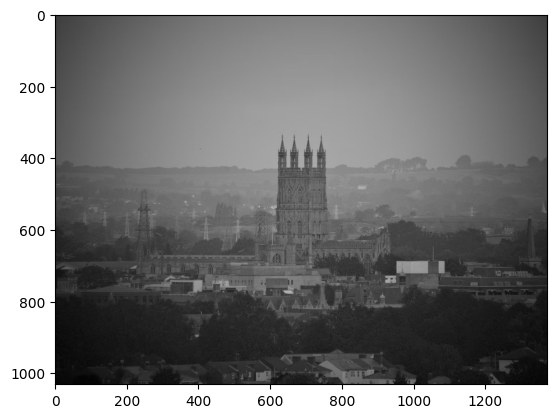

In [28]:
# Image Loading and Display: Load and display various types of images (e.g., grayscale, color, different file formats) using image processing libraries like OpenCV or PIL (Python Imaging Library).

from PIL import Image
import matplotlib.pyplot as plt

# Load an image
image = Image.open('goat.jpg')

# Display the image
plt.imshow(image)
plt.show()

imageGray = Image.open('goat.jpg').convert('L')
plt.imshow(imageGray, cmap='gray')
plt.show()


# % pip install pillow-avif-plugin

import pillow_avif

imageAvif = Image.open('high_cont.avif')
plt.imshow(imageAvif)
plt.show()



In [15]:
# covert image to numpy array
import numpy as np

imageArray = np.array(image)
print(imageArray.shape)

imageGrayArray = np.array(imageGray)
print(imageGrayArray.shape)



(534, 800, 3)
(534, 800)


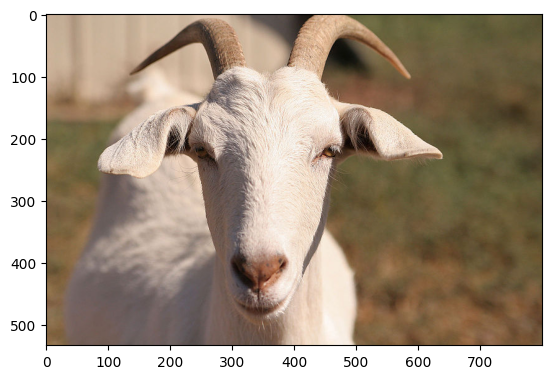

In [18]:
# numpy array to image
imageFromArray = Image.fromarray(imageArray)
plt.imshow(imageFromArray)
plt.show()

In [19]:
# save image
imageFromArray.save('goat_copy.jpg')

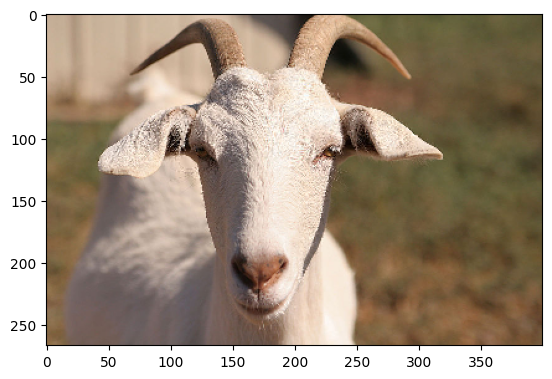

original image shape:
(534, 800, 3)
downsampled image shape:


(267, 400, 3)

In [23]:
# downsampling

def downsample(image, factor):
    image = np.array(image)
    image = image[::factor, ::factor]
    return Image.fromarray(image)

imageDownsampled = downsample(image, 2)
plt.imshow(imageDownsampled)
plt.show()

print("original image shape:")
print(np.array(image).shape)

print("downsampled image shape:")
np.array(imageDownsampled).shape


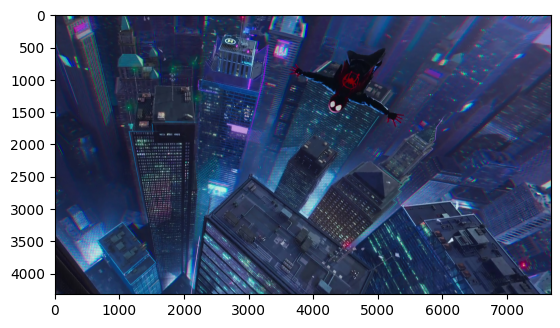

original image shape:
(2160, 3840, 3)
upsampled image shape:


(4320, 7680, 3)

In [27]:
# upsampling
def upsample(image, factor):
    image = np.array(image)
    image = np.repeat(image, factor, axis=0)
    image = np.repeat(image, factor, axis=1)
    return Image.fromarray(image)

image = Image.open('934714.jpg')
imageUpsampled = upsample(image, 2)
plt.imshow(imageUpsampled)
plt.show()

print("original image shape:")
print(np.array(image).shape)

print("upsampled image shape:")
np.array(imageUpsampled).shape


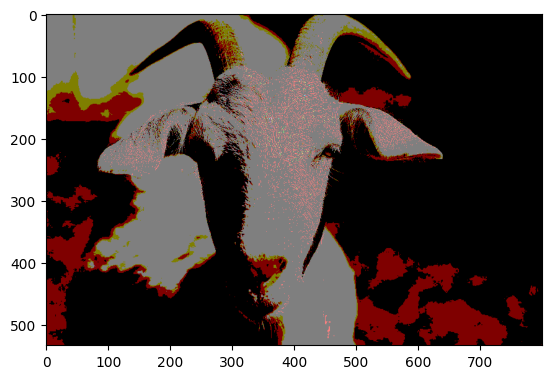

original image shape:
(534, 800, 3)
quantized image shape:
255 0
255 0


In [47]:
# quantization
def quantize(image, levels):
    image = np.array(image)
    image = np.floor(image / 255 * levels) * 255 / levels
    return Image.fromarray(image.astype(np.uint8))

imageQuantized = quantize(image, 2)
plt.imshow(imageQuantized)
plt.show()

print("original image shape:")
print(np.array(image).shape)

print("quantized image shape:")
np.array(imageQuantized).shape

print(np.max(np.array(imageQuantized)), np.min(np.array(imageQuantized)))
print(np.max(np.array(image)), np.min(np.array(image)))


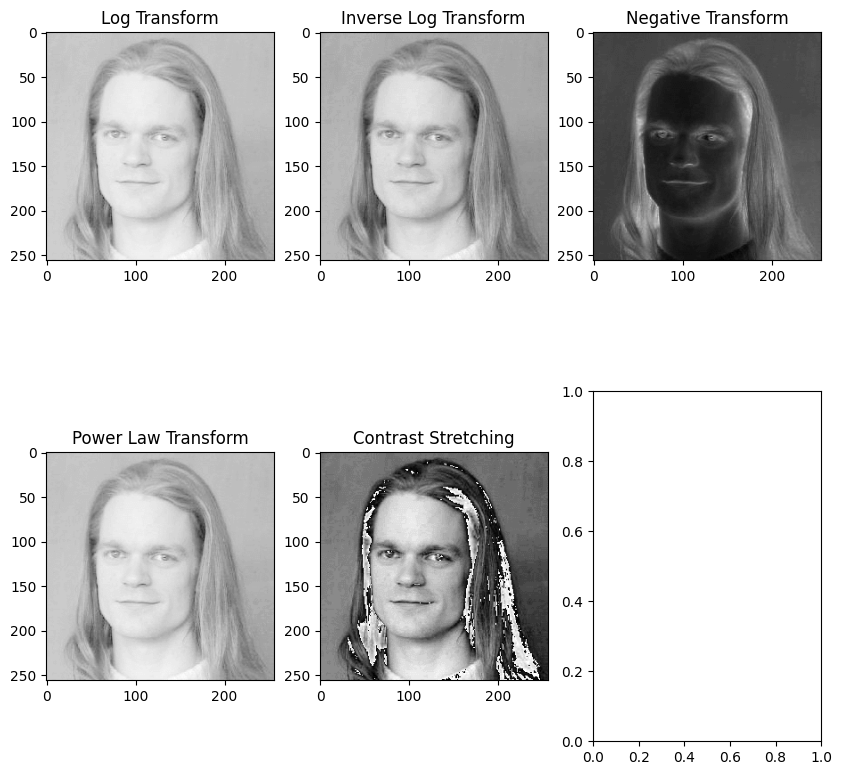

In [61]:
# Intensity Transformations: Apply various intensity transformations (e.g., logarithmic, power-law, contrast stretching) to images and observe their effects.

def log_transform(image):
    '''
    compresses the dynamic range of pixel intensities, emphasizing details in darker regions of the image.

    low-light images
    '''
    image = np.array(image)
    image = np.log(image + 1)
    image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    return Image.fromarray(image.astype(np.uint8))

def inverse_log_transform(image):
    ''' 
    reverse of the logarithmic transformation, expanding the dynamic range of pixel intensities.

    visualization of structures with high-intensity values, such as bones in X-ray images.
    recover details in overexposed region of an image
    '''
    image = np.array(image)
    image = (np.exp(image / 255) - 1) * 255
    image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    return Image.fromarray(image.astype(np.uint8))

def power_law_transform(image, gamma):
    ''' 
    contrast and brightness of an image.

    adjusting the tonal range of images to enhance visibility 



    Increasing Gamma (> 1):
    Effect on Contrast: Increasing gamma (> 1) leads to higher contrast in the image. Dark areas become darker, and bright areas become brighter. This is because higher gamma values amplify the differences between pixel intensities, resulting in stronger contrast.
    Effect on Brightness: Increasing gamma also reduces the overall brightness of the image. Dark areas are pushed towards black, and bright areas are pushed towards white, causing an overall darkening effect.

    Decreasing Gamma (< 1):
    Effect on Contrast: Decreasing gamma (< 1) reduces the contrast in the image. Dark areas become brighter, and bright areas become darker. This is because lower gamma values compress the differences between pixel intensities, resulting in weaker contrast.
    Effect on Brightness: Decreasing gamma increases the overall brightness of the image. Dark areas are lifted towards gray, and bright areas are toned down towards gray, causing an overall brightening effect.

    Gamma = 1 (Linear Transformation):
    When gamma is equal to 1, the power-law transformation has no effect on the image, resulting in a linear transformation. In this case, the contrast and brightness of the image remain unchanged.


    '''
    image = np.array(image)
    image = image / 255
    image = image ** gamma
    image = image * 255
    return Image.fromarray(image.astype(np.uint8))

def contrast_stretching(image, r1, s1, r2, s2):

    ''' 
    expands the dynamic range of pixel intensities 

    visual appearance of images by increasing the contrast between different regions
    reveal details in both dark and bright areas of an image
    '''
    image = np.array(image)
    image = (image - r1) * ((s2 - s1) / (r2 - r1)) + s1
    return Image.fromarray(image.astype(np.uint8))


def nagative_transform(image):
    '''
    use for low contrast image
     highlight features that may not be easily visible in the original image.
    '''
    image = np.array(image)
    image = 255 - image
    return Image.fromarray(image.astype(np.uint8))

image = Image.open('low_cont1.jpg').convert('L')

imageLogTransformed = log_transform(image)

imgInverseLogTransformed = inverse_log_transform(imageLogTransformed)

imagePowerLawTransformed = power_law_transform(image, 0.5)

imageContrastStretched = contrast_stretching(image, 100, 0, 200, 255)

imgNegativeTransformed = nagative_transform(image)

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

axs[0, 0].imshow(imageLogTransformed, cmap='gray')
axs[0, 0].set_title('Log Transform')

axs[0, 1].imshow(imgInverseLogTransformed, cmap='gray')
axs[0, 1].set_title('Inverse Log Transform')

axs[1, 0].imshow(imagePowerLawTransformed, cmap='gray')
axs[1, 0].set_title('Power Law Transform')

axs[1, 1].imshow(imageContrastStretched, cmap='gray')
axs[1, 1].set_title('Contrast Stretching')

axs[0, 2].imshow(imgNegativeTransformed, cmap='gray')
axs[0, 2].set_title('Negative Transform')



plt.show()



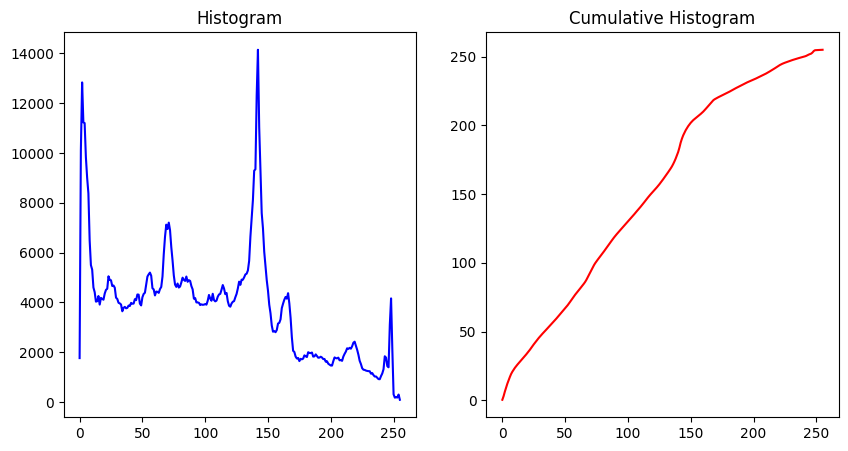

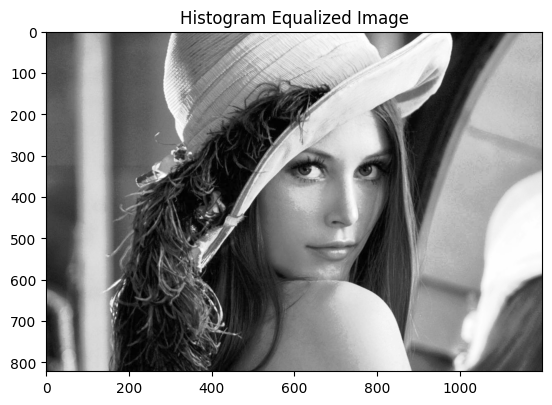

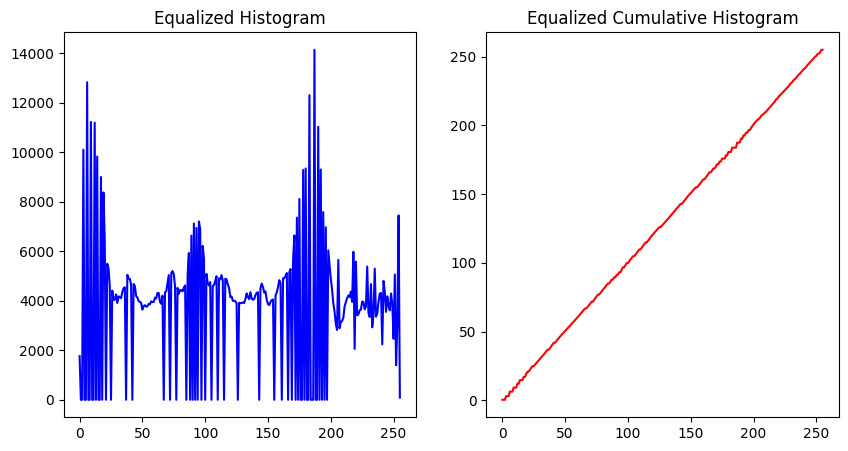

In [68]:
# Histogram Processing: Compute and analyze histograms of images, perform histogram equalization, and observe the impact on image enhancement.


def calculate_histogram(image):
    hist = np.zeros(256)
    for pixel_value in image.flatten():
        hist[pixel_value] += 1
    return hist

def calculate_cumulative_histogram(hist):
    cdf = np.zeros(256)
    cdf[0] = hist[0]
    for i in range(1, 256):
        cdf[i] = cdf[i - 1] + hist[i]

    cdf_normalized = cdf * 255.0 / cdf[-1]
    return cdf_normalized


def histogram_equalization(image):
    hist = calculate_histogram(image)
    cdf = calculate_cumulative_histogram(hist)
    image = np.array(image)
    image_equalized = cdf[image]
    return Image.fromarray(image_equalized.astype(np.uint8))


image = Image.open("lena.jpg").convert("L")

image = np.array(image)
hist = calculate_histogram(image)
cdf = calculate_cumulative_histogram(hist)

imageEqualized = histogram_equalization(image)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(hist, color='b')
axs[0].set_title('Histogram')

axs[1].plot(cdf, color='r')
axs[1].set_title('Cumulative Histogram')

plt.show()


plt.imshow(imageEqualized, cmap='gray')
plt.title('Histogram Equalized Image')
plt.show()


equalized_hist = calculate_histogram(np.array(imageEqualized))
equalized_cdf = calculate_cumulative_histogram(equalized_hist)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(equalized_hist, color='b')
axs[0].set_title('Equalized Histogram')

axs[1].plot(equalized_cdf, color='r')
axs[1].set_title('Equalized Cumulative Histogram')

plt.show()




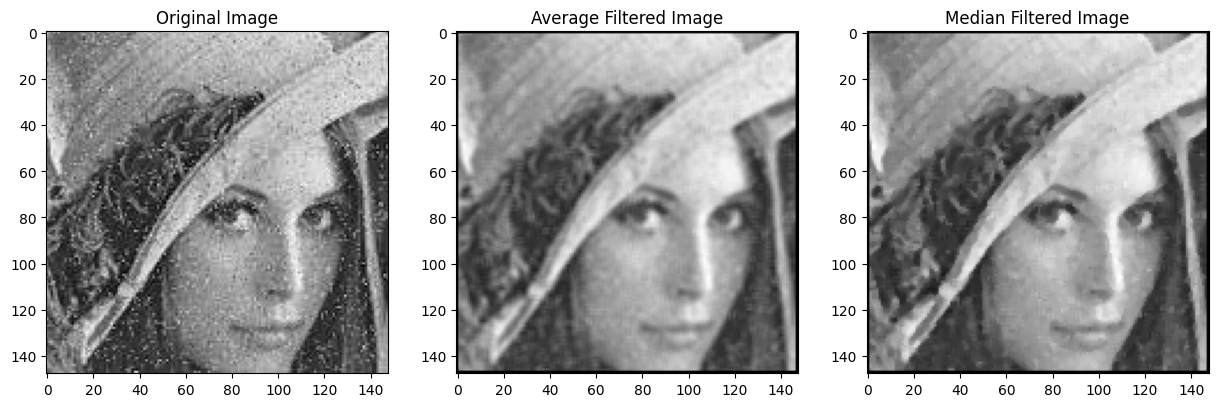

In [72]:
# filtering

def average_filter(image, kernel_size):
    image = np.array(image)
    kernel = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
    image_filtered = np.zeros_like(image)
    for i in range(kernel_size // 2, image.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, image.shape[1] - kernel_size // 2):
            image_filtered[i, j] = np.sum(image[i - kernel_size // 2:i + kernel_size // 2 + 1, j - kernel_size // 2:j + kernel_size // 2 + 1] * kernel)
    return Image.fromarray(image_filtered.astype(np.uint8))

def median_filter(image, kernel_size):
    image = np.array(image)
    image_filtered = np.zeros_like(image)
    for i in range(kernel_size // 2, image.shape[0] - kernel_size // 2):
        for j in range(kernel_size // 2, image.shape[1] - kernel_size // 2):
            image_filtered[i, j] = np.median(image[i - kernel_size // 2:i + kernel_size // 2 + 1, j - kernel_size // 2:j + kernel_size // 2 + 1])
    return Image.fromarray(image_filtered.astype(np.uint8))


image = Image.open('4.jpg').convert('L')

imageAverageFiltered = average_filter(image, 3)
imageMedianFiltered = median_filter(image, 3)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(imageAverageFiltered, cmap='gray')
axs[1].set_title('Average Filtered Image')

axs[2].imshow(imageMedianFiltered, cmap='gray')
axs[2].set_title('Median Filtered Image')

plt.show()


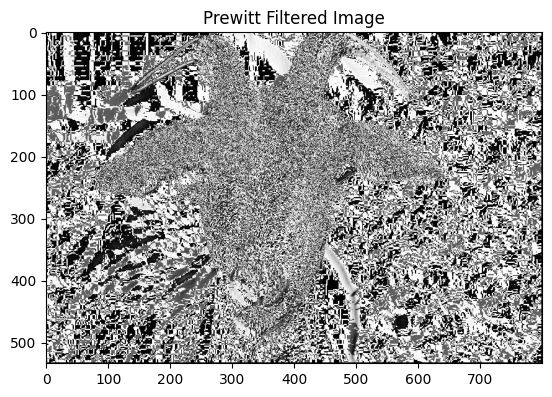

In [74]:
# edge detection

def prewitt_filter(image):
    image = np.array(image)
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    image_filtered_x = np.zeros_like(image)
    image_filtered_y = np.zeros_like(image)
    image_filtered = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            image_filtered_x[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * kernel_x)
            image_filtered_y[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * kernel_y)
            image_filtered[i, j] = np.sqrt(image_filtered_x[i, j] ** 2 + image_filtered_y[i, j] ** 2)
    return Image.fromarray(image_filtered.astype(np.uint8))

image = Image.open('goat.jpg').convert('L')

imagePrewittFiltered = prewitt_filter(image)

plt.imshow(imagePrewittFiltered, cmap='gray')
plt.title('Prewitt Filtered Image')
plt.show()


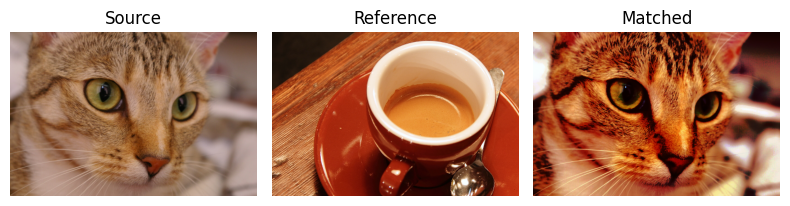

In [83]:

from skimage import data
from skimage import exposure
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
reference = data.coffee()
image = data.chelsea()

matched = match_histograms(image, reference, channel_axis=-1)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()



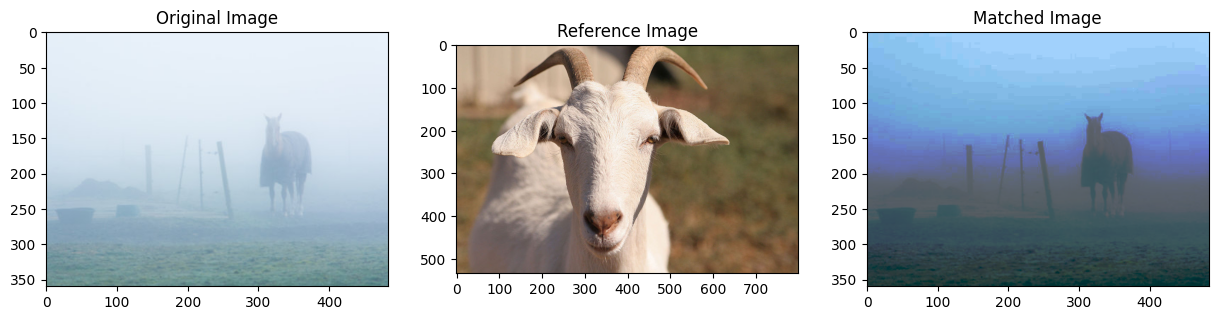

In [80]:
# matched histogram
# may be wrong

def calculate_histogram(image):
    hist = np.zeros(256, dtype=np.int32)  # Use int32 to avoid potential overflows
    for pixel_value in image.flatten():
        hist[pixel_value] += 1
    return hist

def calculate_cumulative_histogram(hist):
    cdf = hist.cumsum()  # Calculate the cumulative sum directly
    cdf_normalized = (cdf - cdf.min()) / (cdf.max() - cdf.min())  # Normalize the CDF to [0, 1]
    cdf_normalized = (cdf_normalized * 255).astype(np.uint8)  # Scale to [0, 255] and convert to uint8
    return cdf_normalized

def histogram_matching(image, reference_image):
    hist = calculate_histogram(image)
    cdf = calculate_cumulative_histogram(hist)
    reference_hist = calculate_histogram(reference_image)
    reference_cdf = calculate_cumulative_histogram(reference_hist)

    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        mapping[i] = np.argmin(np.abs(cdf[i] - reference_cdf)) | 0  # Bitwise OR with 0 to handle negative values

    image = np.array(image)
    image_matched = mapping[image]

    return Image.fromarray(image_matched)



image = Image.open('low_cont.jpg')
reference_image = Image.open('goat.jpg')

image = np.array(image)
reference_image = np.array(reference_image)

imageMatched = histogram_matching(image, reference_image)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(reference_image, cmap='gray')
axs[1].set_title('Reference Image')

axs[2].imshow(imageMatched, cmap='gray')
axs[2].set_title('Matched Image')

plt.show()


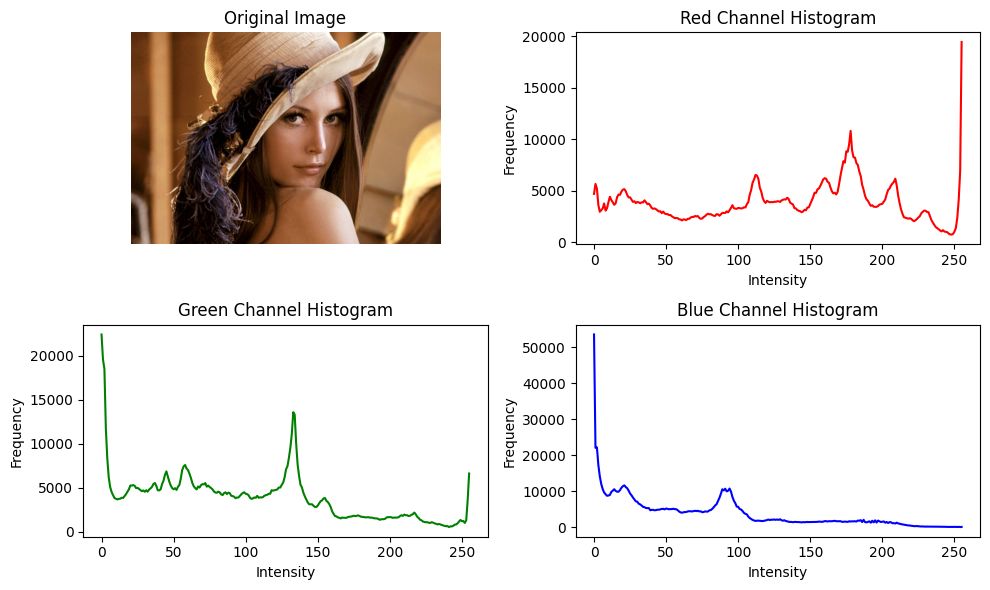

In [87]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image_bgr = cv2.imread('lena.jpg')

# Convert from BGR to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Split the RGB image into its channels
r_channel, g_channel, b_channel = cv2.split(image_rgb)

# Compute histograms for each channel
r_hist = cv2.calcHist([r_channel], [0], None, [256], [0, 256])
g_hist = cv2.calcHist([g_channel], [0], None, [256], [0, 256])
b_hist = cv2.calcHist([b_channel], [0], None, [256], [0, 256])

# Display the original image and histograms
plt.figure(figsize=(10, 6))

# Display original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display histograms
plt.subplot(2, 2, 2)
plt.plot(r_hist, color='red')
plt.title('Red Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.plot(g_hist, color='green')
plt.title('Green Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.plot(b_hist, color='blue')
plt.title('Blue Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


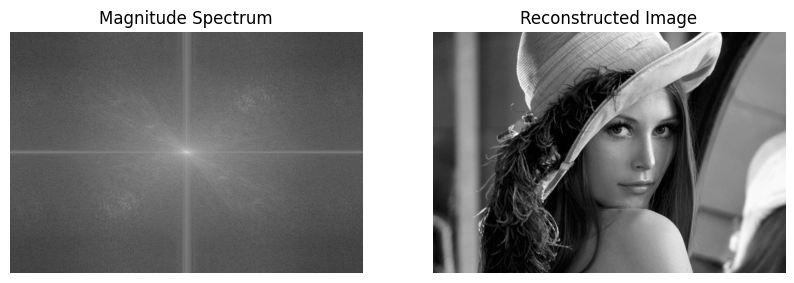

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an example image
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)

# Perform 2D Fourier Transform
fourier_image = np.fft.fft2(image)
fourier_image_shifted = np.fft.fftshift(fourier_image)

# Visualize the magnitude spectrum (logarithmic scale)
magnitude_spectrum = np.log(np.abs(fourier_image_shifted) + 1)  # Add 1 to avoid log(0)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

# Perform inverse 2D Fourier Transform
inverse_fourier_image_shifted = np.fft.ifftshift(fourier_image_shifted)
reconstructed_image = np.fft.ifft2(inverse_fourier_image_shifted).real

# Visualize the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()


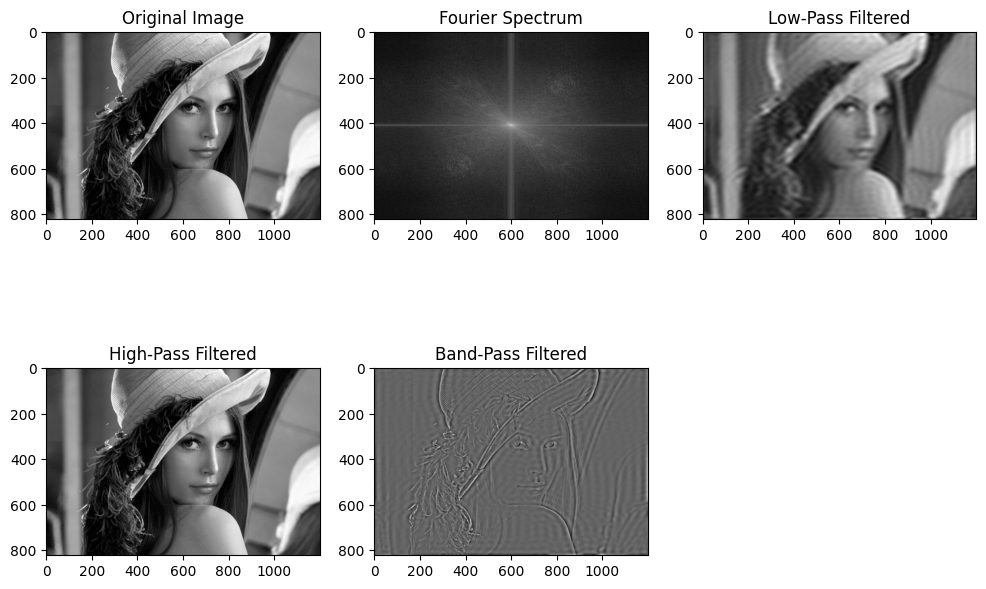

In [95]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)  # Load grayscale image

# Convert the image to float and normalize
image = image.astype(np.float32) / 255.0

# Compute the 2D Fourier Transform
dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center
dft_shift = np.fft.fftshift(dft)

# Compute the magnitudes of the Fourier coefficients
magnitudes = np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Define the filters
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
low_pass_mask = np.zeros((rows, cols, 2), np.uint8)
high_pass_mask = np.ones((rows, cols, 2), np.uint8)
band_pass_mask = np.zeros((rows, cols, 2), np.uint8)
mask_size = 30
low_pass_mask[crow-mask_size:crow+mask_size, ccol-mask_size:ccol+mask_size] = 1
band_pass_mask[crow-mask_size:crow+mask_size, ccol-mask_size:ccol+mask_size] = 1
band_pass_mask = high_pass_mask - band_pass_mask

# Apply the filters
low_pass = dft_shift * low_pass_mask
high_pass = dft_shift * high_pass_mask
band_pass = dft_shift * band_pass_mask

# Inverse Fourier Transform
low_pass_image = cv2.idft(np.fft.ifftshift(low_pass), flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
high_pass_image = cv2.idft(np.fft.ifftshift(high_pass), flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
band_pass_image = cv2.idft(np.fft.ifftshift(band_pass), flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

# Normalize and display the results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(2, 3, 2), plt.imshow(magnitudes, cmap='gray'), plt.title('Fourier Spectrum')
plt.subplot(2, 3, 3), plt.imshow(low_pass_image, cmap='gray'), plt.title('Low-Pass Filtered')
plt.subplot(2, 3, 4), plt.imshow(high_pass_image, cmap='gray'), plt.title('High-Pass Filtered')
plt.subplot(2, 3, 5), plt.imshow(band_pass_image, cmap='gray'), plt.title('Band-Pass Filtered')
plt.show()


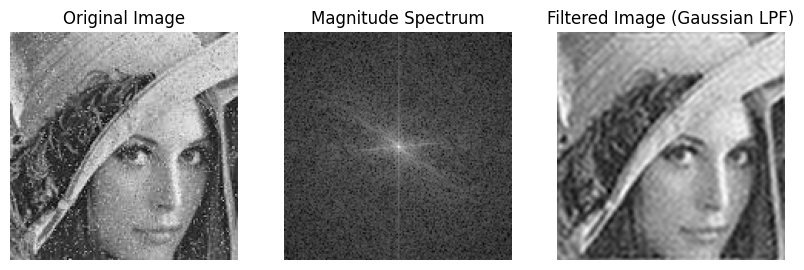

In [103]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy image
image = cv2.imread('4.jpg', cv2.IMREAD_GRAYSCALE)

# Convert the image to float and normalize
image = image.astype(np.float32) / 255.0

# Compute the 2D Fourier Transform
dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)

# Shift the zero-frequency component to the center
dft_shift = np.fft.fftshift(dft)

# Compute the magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Filter design: Gaussian low-pass filter
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2
low_pass_mask = np.zeros((rows, cols, 2), np.uint8)
mask_size = 30  # Adjust this parameter to control the cutoff frequency
low_pass_mask[crow-mask_size:crow+mask_size, ccol-mask_size:ccol+mask_size] = 1

# Apply the filter
filtered_dft_shift = dft_shift * low_pass_mask

# Shift the zero-frequency component back to the corner
filtered_dft = np.fft.ifftshift(filtered_dft_shift)

# Perform inverse Fourier Transform
filtered_image = cv2.idft(filtered_dft, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)

# Normalize the filtered image
filtered_image = cv2.normalize(filtered_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# Display original and filtered images
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Gaussian LPF)')
plt.axis('off')

plt.show()
